# PREDICTION USING SUPERVISED MACHINE LEARNING

#### Task: Predict the percentage of the student based on the number of hours studied

## Author: Pragyan Jyoti Dutta

In [34]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [3]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [15]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

We see there are no null values in the dataset

In [17]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

Text(0, 0.5, 'Score percentage')

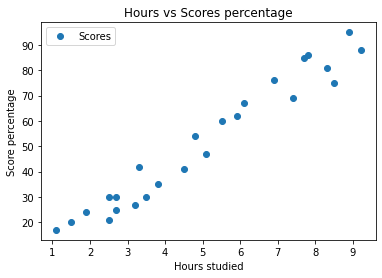

In [14]:
df.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vs Scores percentage")
plt.xlabel("Hours studied")
plt.ylabel("Score percentage")

We see that our data has almost a linear relation. Therefore we can use Linear Regression to this task

In [18]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [19]:
from sklearn.model_selection import train_test_split


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state=0)

In [41]:
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

In [42]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

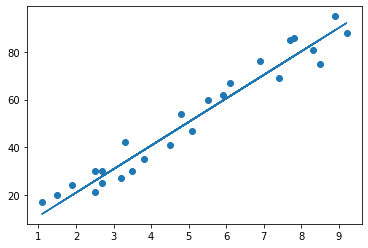

In [43]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [44]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]]


In [45]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,15.947762
1,27,32.773947
2,69,74.344523
3,30,25.845518
4,62,59.497889
5,35,38.712601
6,24,19.906864
7,86,78.303625
8,76,69.395645
9,17,11.988659


Linear Regression seems to give quite an accurate prediction for us

In [46]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.894510863410609


# Alternate models

## Let us use alternate models for the same regression task

### RandomForest Regressor

Training score : 0.9862433894511824
predictions are: 
 [24.07083333 37.865      82.92       24.07083333 63.42       33.87
 24.07083333 83.2        77.62       24.07083333]


r2 score: 0.9288353994108024
MAE: 4.889666666666669
MSE: 42.73007277777779
RMSE: 6.536824364917401


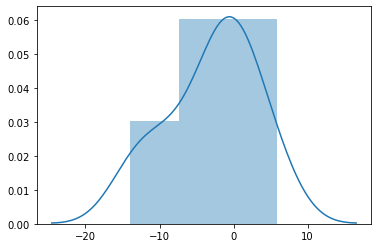

In [47]:
from sklearn.ensemble import RandomForestRegressor

predict(RandomForestRegressor(),0)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

### DecisionTreeRegressor

Training score : 0.9985385131027172
predictions are: 
 [21. 42. 85. 21. 67. 30. 21. 85. 85. 21.]


r2 score: 0.8800879355139565
MAE: 6.8
MSE: 72.0
RMSE: 8.48528137423857


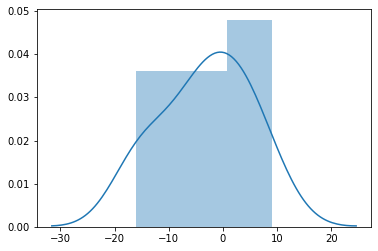

In [49]:
predict(DecisionTreeRegressor(),0)

### Linear Regressor

Training score : 0.9440108159733135
predictions are: 
 [15.9477618  32.77394723 74.344523   25.84551793 59.49788879 38.71260091
 19.90686425 78.30362545 69.39564493 11.98865934]


r2 score: 0.956640847232559
MAE: 4.894510863410609
MSE: 26.034569687682243
RMSE: 5.102408224327238


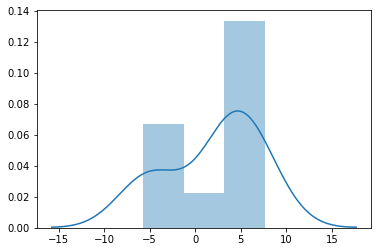

In [50]:
predict(LinearRegression(),0)

#### Conclusion:

Out of all the models tested DecisionTreeRegressor seems to be the best model with 99.8% accuracy on training data